# American Income 

We have heard a lot in recent years about income equality in America. I want to learn what the underlying factors that affect American income are and what affect these factors have.

To accomplish this, I will use data from the NORC's General Social Survey (GSS).  This data is avalible for public download in .sav and .spss format.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import savReaderWriter

In [2]:
# function to the GSS sav files and return them as dataframes
def import_sav(filepath):
    with savReaderWriter.SavReader(filepath) as reader:
        header = reader.header
        records = reader.all()
        header_str = []
        for feature in header:
            header_str.append(feature.decode('ascii'))
        df = pd.DataFrame(records, columns = header_str)
        return df

In [3]:
gss00 = import_sav('C:\\Code\\SSP\\work00.sav')
gss02 = import_sav('C:\\Code\\SSP\\work02.sav')
gss04 = import_sav('C:\\Code\\SSP\\work04.sav')
gss06 = import_sav('C:\\Code\\SSP\\work06.sav')
gss08 = import_sav('C:\\Code\\SSP\\work08.sav')
gss10 = import_sav('C:\\Code\\SSP\\work10.sav')
gss12 = import_sav('C:\\Code\\SSP\\work12.sav')
gss14 = import_sav('C:\\Code\\SSP\\work14.sav')
gss16 = import_sav('C:\\Code\\SSP\\work16.sav')

In [4]:
shared_features = list(set(gss16.columns).intersection(gss14.columns))
shared_features = list(set(shared_features).intersection(gss12.columns))
shared_features = list(set(shared_features).intersection(gss10.columns))
shared_features = list(set(shared_features).intersection(gss08.columns))
shared_features = list(set(shared_features).intersection(gss06.columns))
shared_features = list(set(shared_features).intersection(gss04.columns))
shared_features = list(set(shared_features).intersection(gss02.columns))
shared_features = list(set(shared_features).intersection(gss00.columns))

In [5]:
gss_mult = pd.concat([gss16[shared_features],gss14[shared_features],gss12[shared_features],
                       gss10[shared_features],gss08[shared_features],gss06[shared_features],
                       gss04[shared_features],gss02[shared_features],gss00[shared_features]])

In [6]:
gss_mult.head()

,DEGREE,GENDER8,OTH16,RELATE9,EQWLTH,PRAY,NATEDUCY,GETAHEAD,HEALTH,DWELOWN,...,ATTEND,TEENSEX,LOCALNUM,NATENVIY,TRUST,WRKSTAT,RACDIF4,RELHHD4,SUICIDE4,WKSUB
0,3.0,0.0,0.0,0.0,0.0,6.0,0.0,1.0,2.0,1.0,...,0.0,4.0,7.0,0.0,0.0,1.0,2.0,4.0,1.0,1.0
1,1.0,0.0,0.0,0.0,3.0,6.0,0.0,0.0,0.0,1.0,...,0.0,4.0,3.0,0.0,3.0,1.0,2.0,0.0,1.0,1.0
2,3.0,0.0,0.0,0.0,7.0,1.0,0.0,2.0,2.0,0.0,...,7.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0,2.0,1.0,...,6.0,1.0,2.0,0.0,0.0,2.0,2.0,4.0,1.0,1.0
4,4.0,0.0,0.0,0.0,3.0,6.0,1.0,1.0,1.0,0.0,...,0.0,0.0,4.0,1.0,1.0,2.0,0.0,0.0,0.0,1.0


## Why Research Income Factors?

Americans and global society at large are developing a renewed interest in equality and equity. But, many of the conversations about this topic are plagued with flawed or totally made up statistics. Worse still, many conversations about how to close the gap between unequal demographic groups aren't based on any data on all, just a person's anecdotal experiance.

Inequality and the underlying factors that influence society are important discussions to have, but we as a whole learn nothing without applying real statistical insight.

The GSS data is brimming with insight just waiting to be gleamed.

In [7]:
# clean education level variable
new_edu = []
for num in gss_mult['EDUC']:
    num = int(num)
    # drop 'don't know' and 'no response'
    if num == 98 or num == 99:
        new_edu.append(0)
    # drop education levels where the respondant did not complete elementary school
    elif num in range(1,5):
        new_edu.append(0)
    else:
        new_edu.append(num)
        
gss_mult['EDUC'] = new_edu 

In [8]:
gss_mult = gss_mult.drop(gss_mult[gss_mult['EDUC']==0].index)

In [9]:
# create a new race variable with str categories
new_race = []
for num in gss_mult['RACE']:
    num = int(num)
    if num == 1:
        new_race.append('White')
    elif num == 2:
        new_race.append('Black')
    elif num == 3:
        new_race.append('Other')
        
gss_mult['Race'] = new_race 

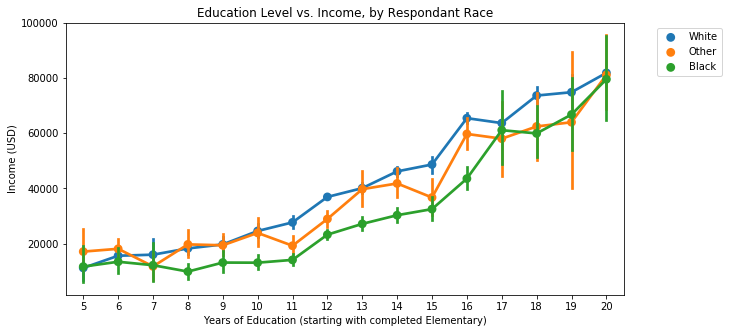

In [10]:
# Looking for overall patterns
fig, ax = plt.subplots(figsize=(10,5))
sns.axes_style("white")
sns.pointplot(x="EDUC"
            ,y="CONINC"
            ,hue='Race'
            ,data=gss_mult
             ,ax=ax)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.title('Education Level vs. Income, by Respondant Race')
plt.xlabel('Years of Education (starting with completed Elementary)')
plt.ylabel('Income (USD)')
plt.show()

From this figure I can clearly see that years of education has an impact on Income, but so does race. Of course, visual inspection alone is not enough to say if the relationship between education level and income are significant (or race and education for that matter).

I won't just be visualization GSS feature realtionships using python's many visualization tools. I would like to analyze and quantify these types of relationships between income and other features, usings Mixed Effect Modeling techniques and other descriptive models such as Linear or Logistic Regression, PCA, and clustering. 

## Challenges

One of the biggest challenges I will face with a project like this is efficiently combing through the GSS data. The GSS contains responses to many different survey questions, many of which do not return for every iternation of the survey (e.g. some questions appear every 2 years, others appear every 6 years). So it can be very difficult to find the correct intersections of GSS years and features I am looking for. 

Additionally, as this is survey data and not behavioral data, I will not always be able to be confidant in my results, even my statistics show obvious significance. I will have to be intelligent with how much I can reduce the general errors in data and accuracy that comes from humans self-reporting.